In [1]:
#Importing Packages
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import audioflux as af
from scipy.io import wavfile
import sounddevice as sd
import librosa
import librosa.display
from sklearn.model_selection import train_test_split
import cv2
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.utils import shuffle


In [2]:
#Loading Datasets
savee = os.listdir('savee_dataset')
crema_d = os.listdir('crema_d_dataset')
ravdess = os.listdir('ravdess_dataset')
tess = os.listdir('TESS')

In [3]:
#Classifying Savee Dataset
emotion = []
for wav in savee:
    w = wav.split('_')[1]
    if w[0:2] == 'sa':
        emotion.append('male_sad')
    elif w[0] == 'n':
        emotion.append('male_neutral')
    elif w[0:2] == 'su':
        emotion.append('male_surprised')
    elif w[0] == 'f':
        emotion.append('male_fear')
    elif w[0] == 'd':
        emotion.append('male_disgust')
    elif w[0] == 'h':
        emotion.append('male_happy')
    elif w[0] =='a':
        emotion.append('male_anger')
print(len(emotion))

480


In [4]:
#Creating Dataframe
emotion_df = pd.DataFrame(emotion, columns=['Emotions'])
path_df = pd.DataFrame(savee, columns=['Path'])
savee_df = pd.concat([emotion_df, path_df], axis = 1)
savee_df['folder'] = 'savee_dataset/'
savee_df.head(10)

,Emotions,Path,folder
0,male_sad,JK_sa01.wav,savee_dataset/
1,male_sad,JK_sa15.wav,savee_dataset/
2,male_neutral,DC_n13.wav,savee_dataset/
3,male_surprised,DC_su09.wav,savee_dataset/
4,male_neutral,DC_n07.wav,savee_dataset/
5,male_neutral,JK_n20.wav,savee_dataset/
6,male_neutral,JK_n08.wav,savee_dataset/
7,male_sad,JE_sa08.wav,savee_dataset/
8,male_fear,JK_f15.wav,savee_dataset/
9,male_fear,JK_f01.wav,savee_dataset/


In [5]:
#Classifying Tess dataset
tess.remove('.DS_Store')
emotion=[]
tess_wavs=[]
for folder in tess:
    fname=os.listdir('TESS/' + folder)
    for files in fname:
        tess_wavs.append(f'{folder}/{files}')
        if folder == 'OAF_Sad' or folder == 'YAF_sad':
            emotion.append('female_sad')
        elif folder == 'OAF_neutral' or folder == 'YAF_neutral':
            emotion.append('female_neutral')
        elif folder == 'OAF_Pleasant_surprise' or folder == 'YAF_pleasant_surprised':
            emotion.append('female_surprised')
        elif folder == 'OAF_Fear' or folder == 'YAF_fear':
            emotion.append('female_fear')
        elif folder == 'OAF_disgust' or folder == 'YAF_disgust':
            emotion.append('female_disgust')
        elif folder == 'OAF_happy' or folder == 'YAF_happy':
            emotion.append('female_happy')
        elif folder =='OAF_angry' or folder == 'YAF_angry':
            emotion.append('female_anger')

In [6]:
#Creating Dataframe for tess
emotion_df = pd.DataFrame(emotion, columns=['Emotions'])
path_df = pd.DataFrame(tess_wavs, columns=['Path'])
tess_df = pd.concat([emotion_df, path_df], axis = 1)
tess_df['folder'] = 'TESS/'

In [7]:
#Classifying crema_d dataset
emotion = []
female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,
          1046,1047,1049,1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,
          1084,1089,1091]
for wav in crema_d:
    w = wav.split('_')
    if int(w[0]) in female:
        if w[2] == 'SAD':
            emotion.append('female_sad')
        elif w[2] == 'NEU':
            emotion.append('female_neutral')
        elif w[2] == 'SUR':
            emotion.append('female_surprised')
        elif w[2] == 'FEA':
            emotion.append('female_fear')
        elif w[2] == 'DIS':
            emotion.append('female_disgust')
        elif w[2] == 'HAP':
            emotion.append('female_happy')
        elif w[2] =='ANG':
            emotion.append('female_anger')
    else:
        if w[2] == 'SAD':
            emotion.append('male_sad')
        elif w[2] == 'NEU':
            emotion.append('male_neutral')
        elif w[2] == 'SUR':
            emotion.append('male_surprised')
        elif w[2] == 'FEA':
            emotion.append('male_fear')
        elif w[2] == 'DIS':
            emotion.append('male_disgust')
        elif w[2] == 'HAP':
            emotion.append('male_happy')
        elif w[2] =='ANG':
            emotion.append('male_anger')
print(len(emotion))

7442


In [8]:
#creating dataset
emotion_df = pd.DataFrame(emotion, columns=['Emotions'])
path_df = pd.DataFrame(crema_d, columns=['Path'])
crema_d_df = pd.concat([emotion_df, path_df], axis = 1)
crema_d_df['folder'] = 'crema_d_dataset/'

In [9]:
#Selecting 1500 male voices to balance dataset
crema_d_df = shuffle(crema_d_df).reset_index(drop=True)

male_crema= crema_d_df[crema_d_df['Emotions'].str.startswith('male')]
male_crema=male_crema.reset_index(drop=True)
male_crema = male_crema.loc[0:1499]
print(male_crema)

          Emotions                 Path            folder
0        male_fear  1038_ITS_FEA_XX.wav  crema_d_dataset/
1     male_neutral  1050_TSI_NEU_XX.wav  crema_d_dataset/
2       male_happy  1070_IOM_HAP_XX.wav  crema_d_dataset/
3       male_anger  1042_WSI_ANG_XX.wav  crema_d_dataset/
4     male_neutral  1057_MTI_NEU_XX.wav  crema_d_dataset/
...            ...                  ...               ...
1495    male_happy  1045_IWW_HAP_XX.wav  crema_d_dataset/
1496  male_disgust  1077_WSI_DIS_XX.wav  crema_d_dataset/
1497  male_disgust  1077_IEO_DIS_MD.wav  crema_d_dataset/
1498     male_fear  1031_IEO_FEA_LO.wav  crema_d_dataset/
1499  male_neutral  1019_MTI_NEU_XX.wav  crema_d_dataset/

[1500 rows x 3 columns]


In [10]:
ravdess.remove('.DS_Store')

In [11]:
#Classifying ravdess dataset
emotion = []
ravdess_wavs = []
for actor in ravdess:
    wavs = os.listdir(f'ravdess_dataset/{actor}')
    for wav in wavs:
        ravdess_wavs.append(f'{actor}/{wav}')
        if int(wav[18:20])%2==0:
            if wav[7:8] == '4':
                emotion.append('female_sad')
            elif wav[7:8] == '1':
                emotion.append('female_neutral')
            elif wav[7:8] == '8':
                emotion.append('female_surprised')
            elif wav[7:8] == '6':
                emotion.append('female_fear')
            elif wav[7:8] == '7':
                emotion.append('female_disgust')
            elif wav[7:8] == '3':
                emotion.append('female_happy')
            elif wav[7:8] =='5':
                emotion.append('female_anger')
            elif wav[7:8] =='2':
                emotion.append('female_neutral')
        else:
            if wav[7:8] == '4':
                emotion.append('male_sad')
            elif wav[7:8] == '1':
                emotion.append('male_neutral')
            elif wav[7:8] == '8':
                emotion.append('male_surprised')
            elif wav[7:8] == '6':
                emotion.append('male_fear')
            elif wav[7:8] == '7':
                emotion.append('male_disgust')
            elif wav[7:8] == '3':
                emotion.append('male_happy')
            elif wav[7:8] =='5':
                emotion.append('male_anger')
            elif wav[7:8] =='2':
                emotion.append('male_neutral')
        
print(len(emotion))

1440


In [12]:
#Creating ravdess dataframe
emotion_df = pd.DataFrame(emotion, columns=['Emotions'])
path_df = pd.DataFrame(ravdess_wavs, columns=['Path'])
ravdess_df = pd.concat([emotion_df, path_df], axis = 1)
ravdess_df['folder'] = 'ravdess_dataset/'

In [13]:
#Combining Datasets
data = pd.concat([savee_df, tess_df, ravdess_df, male_crema], axis=0)
data = data.reset_index(drop=True)

In [22]:
#Removing disgust and surprised data
data = data[data['Emotions'] != 'female_disgust']
data = data[data['Emotions'] != 'male_disgust']
data = data[data['Emotions'] != 'female_happy']
data = data[data['Emotions'] != 'male_happy']
data = data[data['Emotions'] != 'female_anger']
data = data[data['Emotions'] != 'male_anger']
data = data[data['Emotions'] != 'female_surprised']
data = data[data['Emotions'] != 'male_surprised']
data = data[data['Emotions'] != 'female_sad']
data = data[data['Emotions'] != 'male_sad']
data = data.reset_index(drop=True)

In [15]:
#Shuffling Data
data = shuffle(data).reset_index(drop=True)

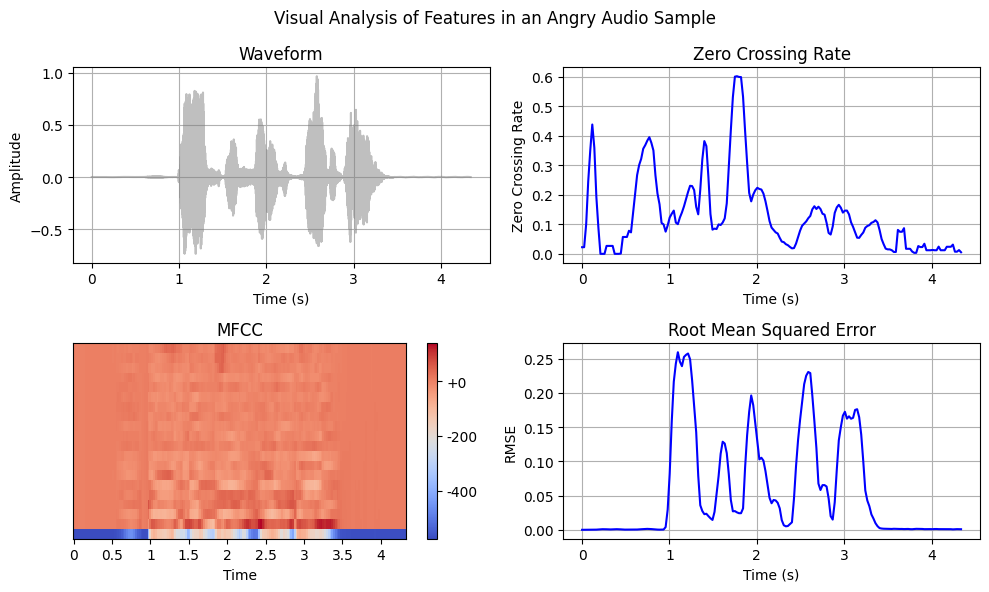

In [16]:
#ANGER
data1,sr=librosa.load('ravdess_dataset/Actor_07/03-01-05-02-02-02-07.wav')
zcr=librosa.feature.zero_crossing_rate(data1)
rmse=librosa.feature.rms(y=data1)
mfcc = librosa.feature.mfcc(y=data1)

# Create time axes
time_zcr = np.linspace(0, len(data1)/sr, len(zcr[0]))
time_wave = np.linspace(0, len(data1)/sr, len(data1))
time_rms = np.linspace(0, len(data1)/sr, len(rmse[0]))


# Create subplots
fig, ax = plt.subplots(2, 2, figsize=(10, 6))

# Plot waveform
ax[0,0].plot(time_wave, data1, color='gray', alpha=0.5)
ax[0,0].set_title('Waveform')
ax[0,0].set_xlabel('Time (s)')
ax[0,0].set_ylabel('Amplitude')
ax[0,0].grid(True)

# Plot ZCR
ax[0,1].plot(time_zcr, zcr[0], color='b')
ax[0,1].set_title('Zero Crossing Rate')
ax[0,1].set_xlabel('Time (s)')
ax[0,1].set_ylabel('Zero Crossing Rate')
ax[0,1].grid(True)

img = librosa.display.specshow(mfcc, x_axis='time',ax=ax[1,0],cmap='coolwarm')
ax[1,0].set_title('MFCC')
plt.colorbar(img, ax=ax[1,0], format='%+2.f')

# Plot RMSE
ax[1,1].plot(time_rms, rmse[0], color='b')
ax[1,1].set_title('Root Mean Squared Error')
ax[1,1].set_xlabel('Time (s)')
ax[1,1].set_ylabel('RMSE')
ax[1,1].grid(True)

plt.suptitle('Visual Analysis of Features in an Angry Audio Sample')
plt.tight_layout()
plt.show()


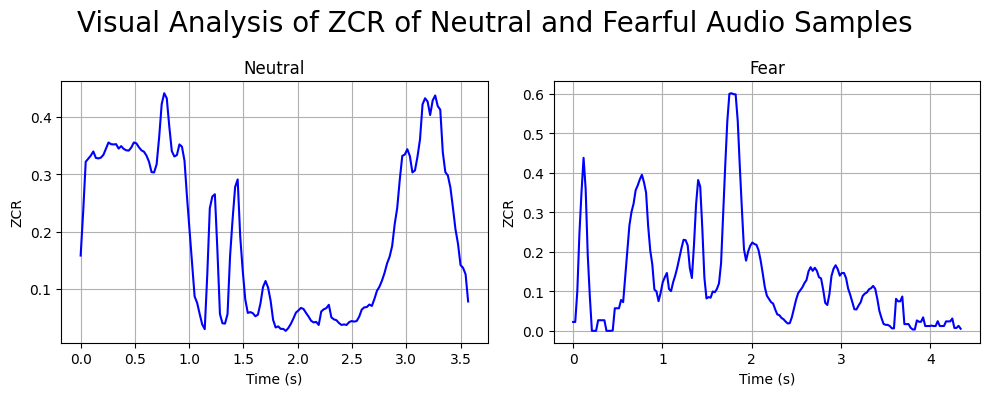

In [21]:
#ZCR for neutral and fear audio
neutral,n_sr=librosa.load('ravdess_dataset/Actor_10/03-01-02-01-01-01-10.wav')
fear,f_sr=librosa.load('ravdess_dataset/Actor_07/03-01-05-02-02-02-07.wav')

n_zcr=librosa.feature.zero_crossing_rate(y=neutral)
f_zcr=librosa.feature.zero_crossing_rate(y=fear)


# Create time axes
n_time_zcr = np.linspace(0, len(neutral)/n_sr, len(n_rmse[0]))
f_time_zcr = np.linspace(0, len(fear)/f_sr, len(f_rmse[0]))
# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Plot neutral
ax[0].plot(n_time_zcr, n_zcr[0], color='b')
ax[0].set_title('Neutral')
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('ZCR')
ax[0].grid(True)

# Plot fear
ax[1].plot(f_time_zcr, f_zcr[0], color='b')
ax[1].set_title('Fear')
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('ZCR')
ax[1].grid(True)


plt.suptitle('Visual Analysis of ZCR of Neutral and Fearful Audio Samples', fontsize=20)
plt.tight_layout()
plt.show()

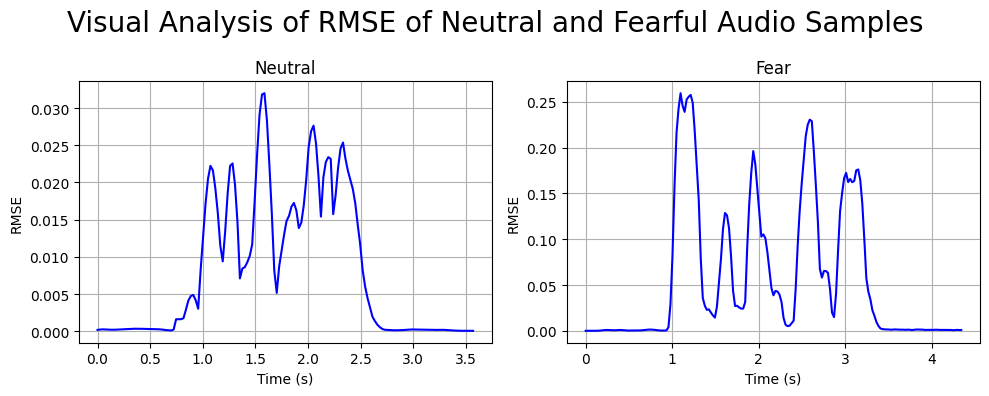

In [17]:
#RMSE for neutral and fear audio
neutral,n_sr=librosa.load('ravdess_dataset/Actor_10/03-01-02-01-01-01-10.wav')
fear,f_sr=librosa.load('ravdess_dataset/Actor_07/03-01-05-02-02-02-07.wav')

n_rmse=librosa.feature.rms(y=neutral)
f_rmse=librosa.feature.rms(y=fear)


# Create time axes
n_time_rmse = np.linspace(0, len(neutral)/n_sr, len(n_rmse[0]))
f_time_rmse = np.linspace(0, len(fear)/f_sr, len(f_rmse[0]))
# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Plot neutral
ax[0].plot(n_time_rmse, n_rmse[0], color='b')
ax[0].set_title('Neutral')
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('RMSE')
ax[0].grid(True)

# Plot fear
ax[1].plot(f_time_rmse, f_rmse[0], color='b')
ax[1].set_title('Fear')
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('RMSE')
ax[1].grid(True)


plt.suptitle('Visual Analysis of RMSE of Neutral and Fearful Audio Samples', fontsize=20)
plt.tight_layout()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


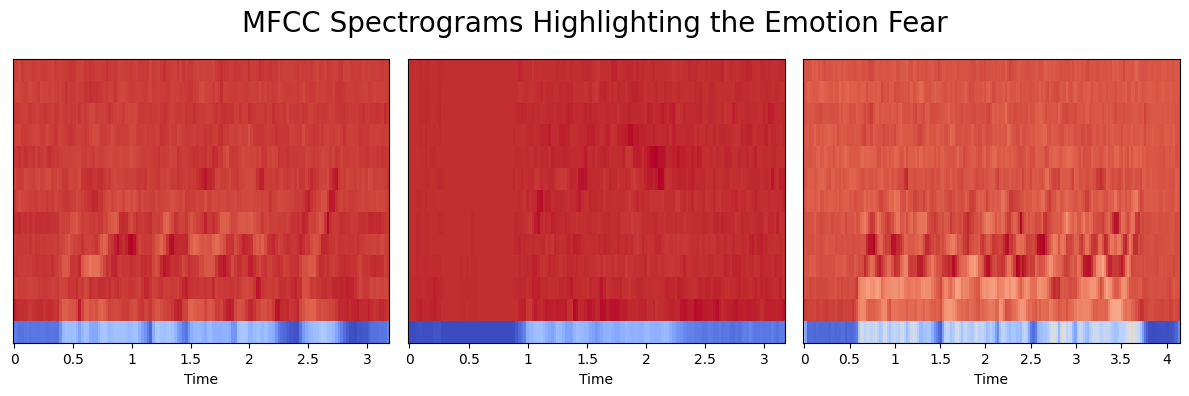

In [18]:
#Fear MFCC audio
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

sad_examples = ['savee_dataset/KL_f07.wav',
               'ravdess_dataset/Actor_09/03-01-06-01-01-01-09.wav',
                'savee_dataset/JK_f01.wav']

for i, sad in enumerate(sad_examples):
    file = os.path.join(sad)
    y, sr = librosa.load(file)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, fmax=400, fmin=90)
    ax = axes.flatten()[i]
    librosa.display.specshow(mfccs, x_axis='time', ax=ax)

plt.suptitle('MFCC Spectrograms Highlighting the Emotion Fear', fontsize=20)
plt.tight_layout()
plt.show()

/var/folders/fy/p_zfmrqj0yn93nq3xwgxytjw0000gn/T/ipykernel_45872/2057230527.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Emotions', palette='husl')


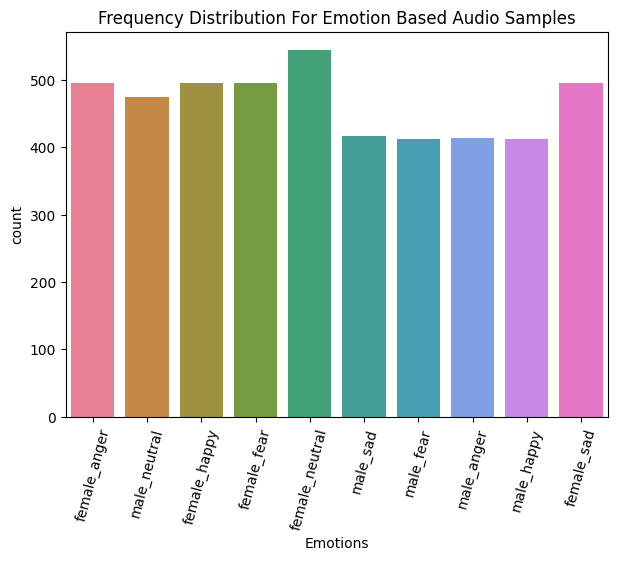

In [26]:
plt.figure(figsize=(7,5))
sns.countplot(data=data, x='Emotions', palette='husl')
plt.xticks(rotation=75)
plt.title('Frequency Distribution For Emotion Based Audio Samples')
plt.show()

In [23]:
#Functions to change noise
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

In [24]:
#Different Features
def zcr(data):
    zcr=librosa.feature.zero_crossing_rate(data)
    return np.squeeze(zcr)

def rmse(data):
    rmse=librosa.feature.rms(y=data)
    return np.squeeze(rmse)

def mfcc(data, flatten:bool=True):
    mfcc = librosa.feature.mfcc(y=data)
    return np.squeeze(mfcc.T) if not flatten else np.ravel(mfcc.T)

def mel(data, flatten:bool=True):
    mel = librosa.feature.melspectrogram(y=data)
    return np.squeeze(mel.T) if not flatten else np.ravel(mel.T)

def extract_features(data):
    result=np.array([])
    result=np.hstack((result, zcr(data), rmse(data), mfcc(data)))
    return result

In [25]:
#Extracting different features for each augmentation
def get_features(path):
    data,sr=librosa.load(path)    
    aud = extract_features(data)
    audio = np.array(aud)

    noise_audio=noise(data)
    naud = extract_features(noise_audio)
    audio=np.vstack((audio,naud))

    pitched_audio=librosa.effects.pitch_shift(data, sr=22050, n_steps=3)
    paud = extract_features(pitched_audio)
    audio=np.vstack((audio,paud))

    pna=noise(pitched_audio)
    pnaud=extract_features(pna)
    audio=np.vstack((audio, pnaud))
    
    '''stretch = librosa.effects.time_stretch(data, rate=1.5)
    pad = len(data)-len(stretch)
    stretch = np.pad(stretch, (0,pad), mode='constant')
    staud = extract_features(stretch)
    audio=np.vstack((audio, staud))

    n_stretch= noise(stretch)
    n_staud = extract_features(n_stretch)
    audio=np.vstack((audio, n_staud))'''
        
    return audio

In [26]:
#Creating features
X=[]
Y=[]
for path,folder,emotion in (zip(data.Path,data.folder,data.Emotions)):
    path = folder+path
    features=get_features(path)
    for feature in features:
        X.append(feature)
        Y.append(emotion)

In [27]:
#putting into dataframe
Emotions = pd.DataFrame(X)
Emotions['Emotions']=Y
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,5843,5844,5845,5846,5847,5848,5849,5850,5851,Emotions
0,0.018555,0.025391,0.027832,0.023926,0.020996,0.020996,0.023926,0.026367,0.028320,0.037109,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,male_neutral
1,0.061035,0.079590,0.094727,0.084473,0.067871,0.068848,0.085449,0.103516,0.107910,0.130859,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,male_neutral
2,0.013672,0.023926,0.035645,0.033203,0.037109,0.034668,0.035645,0.039551,0.045898,0.053223,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,male_neutral
3,0.042969,0.079590,0.114746,0.111328,0.124023,0.123535,0.132324,0.148926,0.150391,0.155762,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,male_neutral
4,0.013672,0.019043,0.023438,0.025879,0.024902,0.027344,0.027832,0.039551,0.041992,0.041504,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,male_neutral


In [ ]:
Emotions.shape

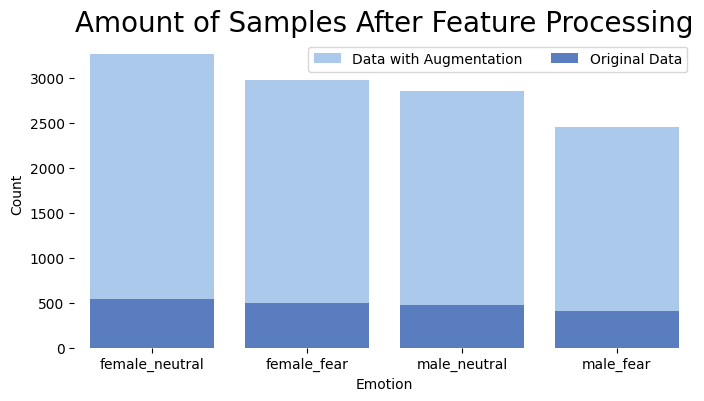

In [31]:
#Comparitive graphs of amount of samples
original_counts = data['Emotions'].value_counts().reset_index()
original_counts.columns = ['Emotion', 'Count']

value_counts = Emotions['Emotions'].value_counts().reset_index()
value_counts.columns = ['Emotion', 'Count']

f, ax = plt.subplots(figsize=(8, 4))

sns.set_color_codes("pastel")
sns.barplot(data=value_counts, x='Emotion', y='Count',
            label="Data with Augmentation", color="b")

sns.set_color_codes("muted")
sns.barplot(data=original_counts, x='Emotion', y='Count',
            label="Original Data", color="b")

ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(ylabel="Count",
       xlabel="Emotion")
#ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
ax.set_title('Amount of Samples After Feature Processing', fontsize=20)
sns.despine(left=True, bottom=True)